In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
#Importation de la fonction train_test_split
from sklearn.model_selection import train_test_split

Ne jamais évaluer la performance d'un modèle sur les données d'entrainement
=> Séparer les données du dataset

Pour les séparer utiliser la fonction: train_test_split


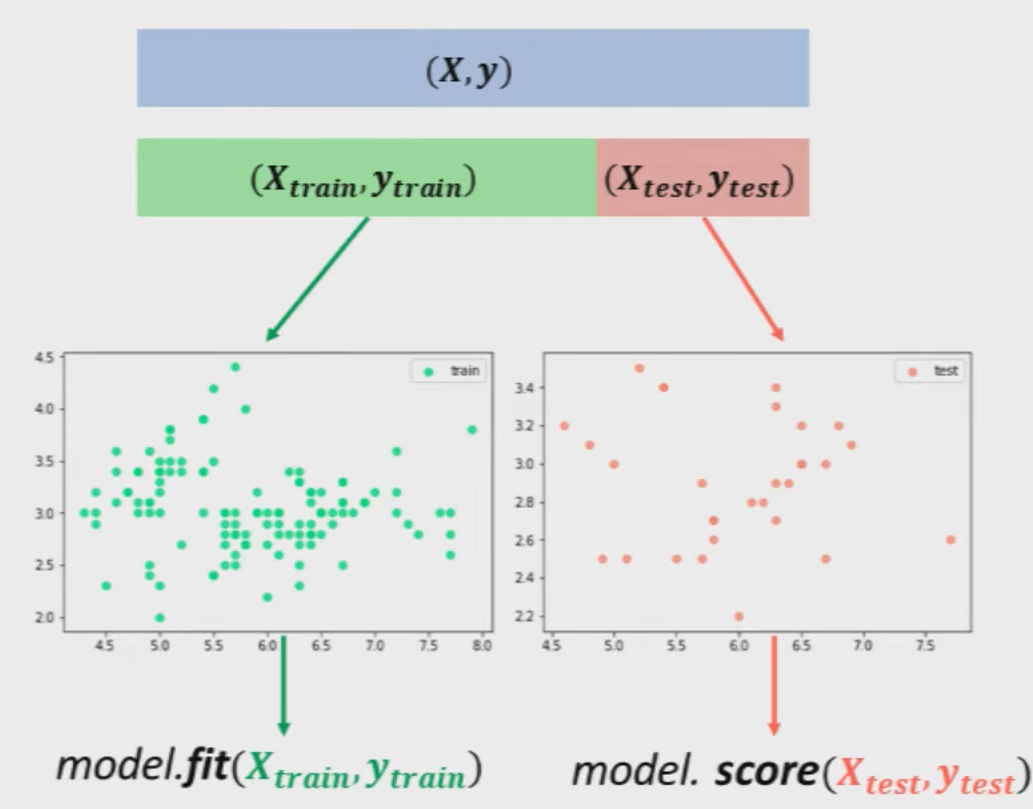

Module: model selection

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter (X[:, 0], X[:, 1], c=y, alpha=0.8)

In [6]:
#function(X, y, test_size=taille_pourcentage_test, random_state=fixe_aleatoire)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)